# LetsGrowMore #DEC2021

Name - Siddhesh D Patil

Task-1: Iris Flowers Classification ML Project

Level : Beginner

Dataset-:http://archive.ics.uci.edu/ml/datasets/Iris

# Importing Required Libraires 

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import sklearn 
#%matplotlib inline

import warnings; warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [7]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
data.columns = columns
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
data.shape

(149, 5)

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

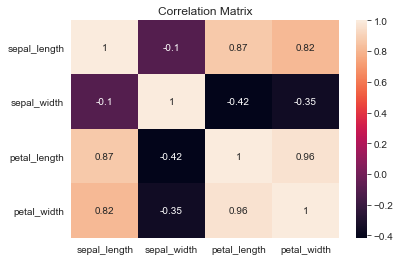

In [12]:
sns.set_style('darkgrid')
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix');

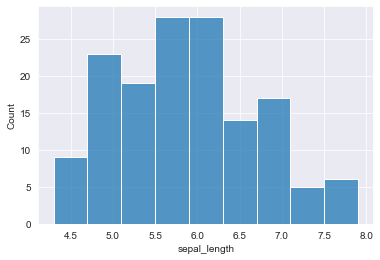

In [13]:
sns.histplot(data['sepal_length']);

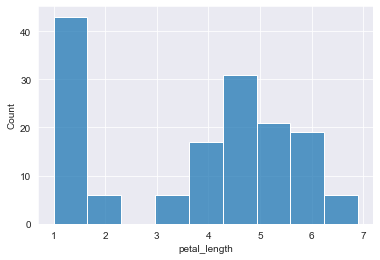

In [14]:
sns.histplot(data['petal_length']);

# Model Building

In [15]:
# Preprocessing data  -> drop species to get X, only extract species to get Y
X = data.drop('species', axis=1)
y = data['species']

In [16]:
# Train Test Split  -> use train_test_split()
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [17]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler  
mms = MinMaxScaler()

In [18]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


In [19]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=9)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 14  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



# The results show that our KNN algorithm was able to classify all the 37 out of 38 records in the test set with 97% accuracy, which is excellent